<module 'matplotlib.pyplot' from 'c:\\program files\\python37\\lib\\site-packages\\matplotlib\\pyplot.py'>

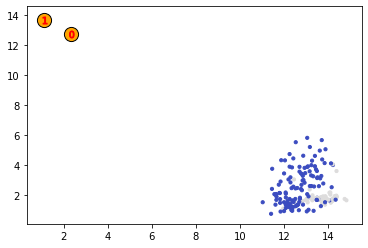

In [19]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm

df = pd.read_csv("wine.data.csv")

clusters = 2

km = KMeans(n_clusters = clusters, n_init = 50, tol = 1e-10, random_state = 1234).fit(df)

centers = km.cluster_centers_

labels = km.predict(df)

df['label'] = labels

groups = df.groupby('label')

colors = cm.coolwarm(np.array(labels).astype(float)/clusters)

fig, ax = plt.subplots()

ax.scatter(df['a'], df['b'], marker = 'o', s = 10, c = colors)

ax.scatter(centers[:,0], centers[:,1], s = 200, c = 'orange', edgecolor = 'k')

for i,c in enumerate(centers):
        ax.scatter(c[0], c[1], marker = '$%d$' %i, c = 'red', s = 50)
        
    
plt





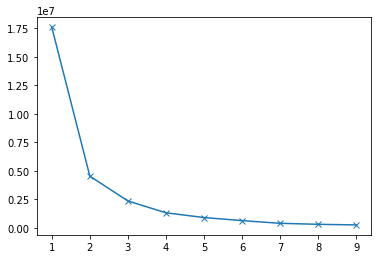

In [25]:
inertias = []

for i in range(1, 10) :
    km = KMeans(n_clusters = i, n_init = 50, tol = 1e-10, random_state = 1234).fit(df)
    inertias.append(km.inertia_)
    
fig2,ax2 = plt.subplots()
ax2.plot(range(1, 10), inertias, 'x-')
    
plt.show()

In [32]:
from sklearn.metrics import silhouette_score

scores = []

for i in range(1, 10) :
    km = KMeans(n_clusters = i, n_init = 10, tol = 1e-10, random_state = 1234).fit(df)
    sc = silhouette_score(df, km)
    print("For k = %d, the score is %g"%(i,sc))
    scores.append(sc)
    
print("\nk = ", scores.index(max(scores)) + 2, "since", round(max(scores), 4), "is the closest score to 1")

ValueError: bad input shape ()